## Data Preprocessing

* This file generates pairplots and a heatmap for the data cleaned using "ECS171project_final_data_preprocessing.ipynb"
* Run that file first to ensure there is a NFL_data_super_cleaned.csv file in the current working directory.

In [2]:
import pandas as pd
import os
import numpy as np
import seaborn as sb
from numpy import array
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder

nfl1 = pd.read_csv("NFL_data_super_cleaned.csv")
#Backup created so that play type can be preserved
nfl_backup = nfl1.dropna(subset = ["play_type"])

# drop all non-continuous columns (except play_type)
nfl1=nfl1.drop(columns=['posteam','qtr', 'down',])


### One-Hot Encoding

In [3]:
# encoding play_type
# convert to an array
nfl_home = array(nfl1["play_type"])

# encode as integers
home_encoder = LabelEncoder()
home_encoded =  home_encoder.fit_transform(nfl_home) 
 
# binary encode
home_onehot_encoder = OneHotEncoder(sparse=False) # disable sparse return type
# reshape the array
home_encoded = home_encoded.reshape(len(home_encoded), 1) 
home_onehot_encoded = home_onehot_encoder.fit_transform(home_encoded) 

nfl1["play_type"] = home_onehot_encoded.tolist()

In [4]:
nfl1["play_type"] = home_onehot_encoded.tolist()
nfl1.head()

,yardline_100,quarter_seconds_remaining,goal_to_go,ydstogo,score_margin,play_type
0,58.0,893.0,0.0,10,0.0,"[0.0, 1.0, 0.0]"
1,53.0,856.0,0.0,5,0.0,"[0.0, 0.0, 1.0]"
2,56.0,815.0,0.0,8,0.0,"[0.0, 1.0, 0.0]"
3,56.0,807.0,0.0,8,0.0,"[1.0, 0.0, 0.0]"
4,98.0,796.0,0.0,10,0.0,"[0.0, 0.0, 1.0]"


### Data Visualization - Pair Plots and Heatmap Generator 

__Note:__ Because these plots are generated from all 350,000+ samples in our cleaned dataset, this segment of code will take 10 or more minutes to run. 

<function matplotlib.pyplot.show(close=None, block=None)>

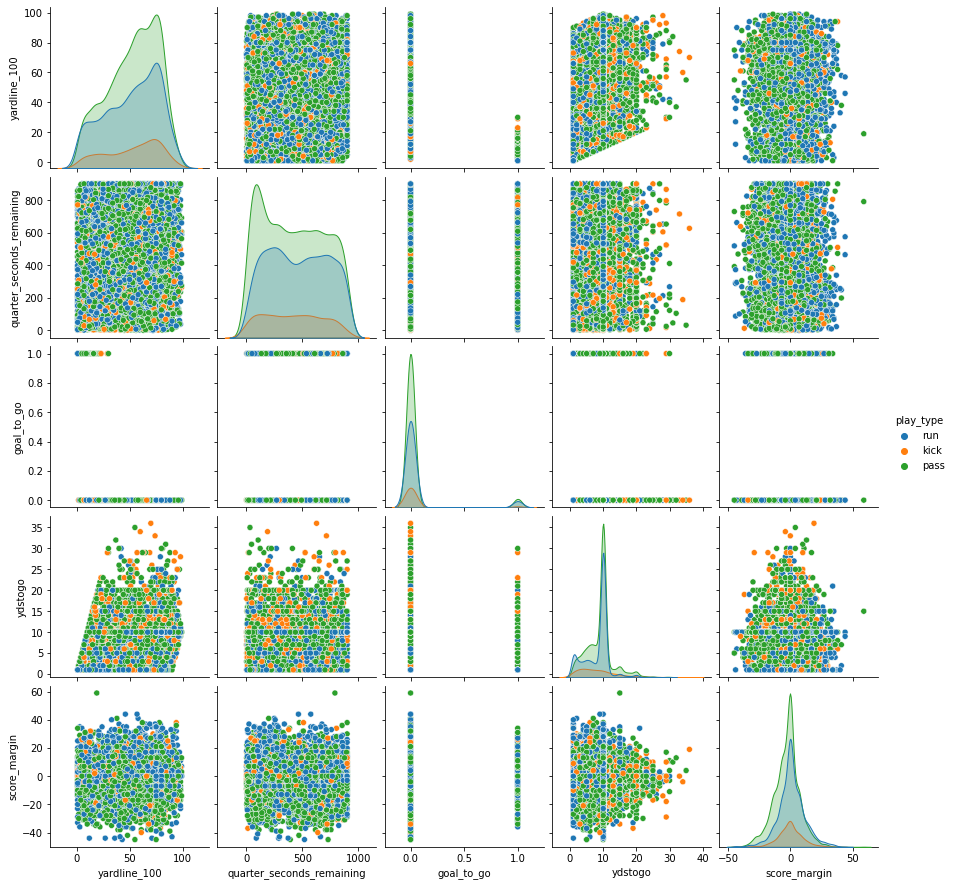

In [7]:
#Data visualization

#nfl1 is data frame, copy to nfl_copy
nfl_copy1 = nfl1.copy()

#Preserve play type and remove encoding for pairplot with copy #2
nfl_copy2= nfl_copy1.copy()
nfl_copy2["play_type"] = nfl_backup["play_type"]

nfl_copy1.drop("play_type", axis=1, inplace=True)

#Make heatmap
# svm = sb.heatmap(nfl_copy1.corr(), annot=True, vmin=-1, vmax=1, center=0)

# figure = svm.get_figure()
# figure.savefig('nfl_heatmap.png', dpi=400)


#Make pairplots

sample = nfl_copy2.sample(n=10000, random_state=21, axis=0)

nfl_plots = sb.pairplot(sample, hue='play_type', diag_kind='kde')
nfl_plots.savefig("nfl_pairplots.png")
plt.show